## Checking Quality of Red Wine - KNN Project

## STEP 1: LOAD DATASET AND CHECK IT OUT

Import our libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier


Import our dataset and check it

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
# check name of our columns and what data types we have and if we have an null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Quality is our y, so lets inspect it

In [6]:
df['quality'].nunique()

6

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Let's convert our 'quality' to 3 classes:  Low, Medium and High

In [9]:
# 3-4 = low, 5-6=med, 7-8=high, create a new variable for our target y
def quality_to_label(q):
    if q <= 4:
        return 0 
    elif q <= 6:
        return 1 
    else:
        return 2 

df['quality_label'] = df['quality'].apply(quality_to_label)

In [10]:
df['quality_label'].value_counts().sort_index()

quality_label
0      63
1    1319
2     217
Name: count, dtype: int64

In [11]:
df[['quality', 'quality_label']].head(10)

,quality,quality_label
0,5,1
1,5,1
2,5,1
3,6,1
4,5,1
5,5,1
6,5,1
7,7,2
8,7,2
9,5,1


## STEP 2: TRAIN THE KNN MODEL

Create out splits

In [12]:
# splitting our train and test splits
# stratify makes sure your train and test sets keep the same class proportions as the original dataset, use when target is categorical
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['quality_label'])

In [13]:
# assigning our train splits
X_train = train_df.drop(columns=['quality', 'quality_label'])
y_train = train_df['quality_label']

In [14]:
# assigning our test splits
X_test = test_df.drop(columns=['quality', 'quality_label'])
y_test = test_df['quality_label']

In [15]:
# verify
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
72,7.7,0.69,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5
1212,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4
1305,7.5,0.61,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8
315,7.1,0.35,0.29,2.5,0.096,20.0,53.0,0.99620,3.42,0.65,11.0
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5
...,...,...,...,...,...,...,...,...,...,...,...
562,9.0,0.54,0.49,2.9,0.094,41.0,110.0,0.99820,3.08,0.61,9.2
1263,8.2,0.78,0.00,2.2,0.089,13.0,26.0,0.99780,3.37,0.46,9.6
209,11.0,0.30,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
910,9.3,0.38,0.48,3.8,0.132,3.0,11.0,0.99577,3.23,0.57,13.2


In [16]:
# verify, created a dataframe so we could see the column name
pd.DataFrame(y_train, columns=['quality_label'])

,quality_label
72,1
1212,1
1305,1
315,1
1061,2
...,...
562,1
1263,0
209,2
910,1


In [17]:
# verify
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.380,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.99690,3.46,0.79,9.3
756,6.3,0.980,0.01,2.0,0.057,15.0,33.0,0.99488,3.60,0.46,11.2
170,7.9,0.885,0.03,1.8,0.058,4.0,8.0,0.99720,3.36,0.33,9.1
1058,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6
...,...,...,...,...,...,...,...,...,...,...,...
468,11.4,0.360,0.69,2.1,0.090,6.0,21.0,1.00000,3.17,0.62,9.2
691,9.2,0.920,0.24,2.6,0.087,12.0,93.0,0.99980,3.48,0.54,9.8
697,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5
1210,6.8,0.650,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4


In [18]:
# verify, created a dataframe so we could see the column name
pd.DataFrame(y_test, columns=['quality_label'])

,quality_label
1016,2
107,1
756,1
170,0
1058,2
...,...
468,1
691,1
697,1
1210,1


Import scaler and scale dataset

In [19]:
# try both and see what we get
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [20]:
# assign StandardScaler to a variable to use
knn_standard_scaler = StandardScaler()

In [21]:
# assign MinMaxScaler to a variable to use
knn_minmax_scaler = MinMaxScaler()

In [22]:
# standardize our values so they are all scaled beforre funning knn
# fit calulates the mean and std
# transform converts everything to the same scale
X_train_standard_scaled = knn_standard_scaler.fit_transform(X_train)
X_test_standard_scaled  = knn_standard_scaler.transform(X_test)

In [23]:
# standardize our values so they are all scaled beforre funning knn
# fit calulates the mean and std
# transform converts everything to the same scale
X_train_minmax_scaled = knn_minmax_scaler.fit_transform(X_train)
X_test_minmax_scaled  = knn_minmax_scaler.transform(X_test)

In [24]:
# create a dataframe to preserve column names and row alignment
X_train_standard_scaled = pd.DataFrame(X_train_standard_scaled, columns=X_train.columns, index=X_train.index)

In [25]:
# view
X_train_standard_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
72,-0.344598,0.909429,-0.246352,-0.453749,-0.062695,0.212513,1.492586,-0.332858,-0.021904,-1.059505,-0.863522
1212,-0.868249,0.683271,-1.275703,-0.311255,-0.199183,-0.743872,-0.965083,-0.919855,0.238096,-0.204856,-0.023959
1305,-0.460965,0.457112,-0.040482,-0.453749,-0.312923,0.786345,1.305928,-0.322375,-0.086904,-0.754273,-0.583668
315,-0.693699,-1.012915,0.113921,-0.026265,0.210281,0.403790,0.217087,-0.280447,0.693096,-0.021717,0.535749
1061,0.469972,-0.730217,1.194739,-0.524997,-0.358419,-0.839510,-0.933973,-1.108532,-0.671904,0.222468,1.935020
...,...,...,...,...,...,...,...,...,...,...,...
562,0.411788,0.061336,1.143271,0.258724,0.164785,2.412199,1.990342,0.767762,-1.516904,-0.265902,-1.143376
1263,-0.053680,1.418284,-1.378638,-0.240007,0.051045,-0.265679,-0.622876,0.558120,0.368096,-1.181598,-0.770237
209,1.575459,-1.295612,1.606479,-0.311255,-0.745135,-0.839510,-0.840644,0.662941,-0.021904,1.382349,0.069325
910,0.586339,-0.843296,1.091804,0.899950,1.029209,-1.222064,-1.089522,-0.505812,-0.541904,-0.510088,2.588013


In [26]:
# create a dataframe to preserve column names and row alignment
X_test_standard_scaled = pd.DataFrame(X_test_standard_scaled, columns=X_test.columns, index=X_test.index)

In [27]:
# view
X_test_standard_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,0.353605,-0.843296,0.680064,-0.240007,-0.426663,-0.361318,-0.560656,-0.982747,-0.281904,0.588746,2.028305
107,-1.217351,0.570191,0.216856,-0.596244,0.028297,-0.074402,0.559294,0.086426,0.953096,0.832932,-1.050091
756,-1.159167,2.549074,-1.327170,-0.382502,-0.676891,-0.074402,-0.405108,-0.972265,1.863097,-1.181598,0.722319
170,-0.228230,2.011949,-1.224235,-0.524997,-0.654143,-1.126426,-1.182851,0.243657,0.303096,-1.975200,-1.236661
1058,0.935440,0.004796,1.555012,-0.097512,0.142037,1.360176,0.185977,0.191247,-0.801904,0.649793,1.095457
...,...,...,...,...,...,...,...,...,...,...,...
468,1.808193,-0.956375,2.172622,-0.311255,0.073793,-0.935149,-0.778424,1.711150,-0.931904,-0.204856,-1.143376
691,0.528155,2.209837,-0.143417,0.044982,0.005549,-0.361318,1.461476,1.606329,1.083096,-0.693227,-0.583668
697,-0.751882,0.683271,-1.275703,-0.311255,-0.472159,-0.743872,-0.653985,0.243657,1.018096,0.100376,-0.863522
1210,-0.868249,0.683271,-1.275703,-0.311255,-0.199183,-0.743872,-0.965083,-0.919855,0.238096,-0.204856,-0.023959


Confirm we scaled our dataset

In [28]:
X_train_standard_scaled.mean()

fixed acidity           4.124926e-16
volatile acidity        3.208275e-16
citric acid            -1.777746e-16
residual sugar          2.249959e-16
chlorides               2.430512e-16
free sulfur dioxide     1.388864e-17
total sulfur dioxide   -1.111091e-17
density                -3.501326e-15
pH                     -1.769413e-15
sulphates              -5.114491e-16
alcohol                -6.458217e-16
dtype: float64

In [29]:
X_train_standard_scaled.std()

fixed acidity           1.000391
volatile acidity        1.000391
citric acid             1.000391
residual sugar          1.000391
chlorides               1.000391
free sulfur dioxide     1.000391
total sulfur dioxide    1.000391
density                 1.000391
pH                      1.000391
sulphates               1.000391
alcohol                 1.000391
dtype: float64

In [30]:
X_test_standard_scaled.mean()

fixed acidity           0.079597
volatile acidity       -0.037608
citric acid             0.079984
residual sugar          0.006909
chlorides               0.080760
free sulfur dioxide     0.046342
total sulfur dioxide    0.069316
density                 0.030330
pH                     -0.073294
sulphates               0.140056
alcohol                -0.012590
dtype: float64

In [31]:
X_test_standard_scaled.std()

fixed acidity           1.061285
volatile acidity        1.060102
citric acid             1.010387
residual sugar          1.022503
chlorides               1.314345
free sulfur dioxide     1.001112
total sulfur dioxide    1.110390
density                 0.944060
pH                      1.015352
sulphates               1.157046
alcohol                 0.970045
dtype: float64

## STEP 3: EVALUATE PERFORMANCE

Create baseline KNN trying both STANDARD and MINMAX

In [33]:
# zero_division=0 gets rid of the warning notes we get at the end
def model_evaluator(X, y, model, dataset_name="Dataset"):
    preds = model.predict(X)

    print(f"\n Evaluation on {dataset_name}")
    print("-" * 45)

    print(f"Accuracy:         {accuracy_score(y, preds):.4f}")
    print(f"Precision (macro): {precision_score(y, preds, average='macro', zero_division=0):.4f}")
    print(f"Recall (macro):    {recall_score(y, preds, average='macro', zero_division=0):.4f}")
    print(f"F1 Score (macro):  {f1_score(y, preds, average='macro', zero_division=0):.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y, preds))

    print("\nClassification Report:")
    print(classification_report(y, preds, zero_division=0))

In [34]:
# STANDARD
# initial k value for training is 5
knn_standard = KNeighborsClassifier(n_neighbors=5)
knn_standard.fit(X_train_standard_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [35]:
# MINMAX
# initial k value for training is 5
knn_minmax = KNeighborsClassifier(n_neighbors=5)
knn_minmax.fit(X_train_minmax_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [36]:
# view training output
model_evaluator(X_train_standard_scaled, y_train, knn_standard, 'Training STANDARD Set (Baseline KNN)')


 Evaluation on Training STANDARD Set (Baseline KNN)
---------------------------------------------
Accuracy:         0.8726
Precision (macro): 0.7199
Recall (macro):    0.5474
F1 Score (macro):  0.5896

Confusion Matrix:
[[   7   42    1]
 [   6 1015   34]
 [   0   80   94]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.14      0.22        50
           1       0.89      0.96      0.93      1055
           2       0.73      0.54      0.62       174

    accuracy                           0.87      1279
   macro avg       0.72      0.55      0.59      1279
weighted avg       0.86      0.87      0.86      1279



MINMAX DID BETTER ON TRAINING

In [37]:
# view training output
model_evaluator(X_train_minmax_scaled, y_train, knn_minmax, 'Training MINMAX Set (Baseline KNN)')


 Evaluation on Training MINMAX Set (Baseline KNN)
---------------------------------------------
Accuracy:         0.8819
Precision (macro): 0.7966
Recall (macro):    0.5767
F1 Score (macro):  0.6252

Confusion Matrix:
[[   9   40    1]
 [   3 1017   35]
 [   0   72  102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.18      0.29        50
           1       0.90      0.96      0.93      1055
           2       0.74      0.59      0.65       174

    accuracy                           0.88      1279
   macro avg       0.80      0.58      0.63      1279
weighted avg       0.87      0.88      0.87      1279



In [38]:
# view testing output
model_evaluator(X_test_standard_scaled, y_test, knn_standard, 'Test STANDARD Set (Baseline KNN)')


 Evaluation on Test STANDARD Set (Baseline KNN)
---------------------------------------------
Accuracy:         0.8187
Precision (macro): 0.4517
Recall (macro):    0.4541
F1 Score (macro):  0.4523

Confusion Matrix:
[[  0  13   0]
 [  1 243  20]
 [  0  24  19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.92      0.89       264
           2       0.49      0.44      0.46        43

    accuracy                           0.82       320
   macro avg       0.45      0.45      0.45       320
weighted avg       0.78      0.82      0.80       320



MINMAX DID BETTER ON TESTING SLIGHTLY

In [39]:
# view testing output
model_evaluator(X_test_minmax_scaled, y_test, knn_minmax, 'Test MINMAX Set (Baseline KNN)')


 Evaluation on Test MINMAX Set (Baseline KNN)
---------------------------------------------
Accuracy:         0.8187
Precision (macro): 0.4611
Recall (macro):    0.4606
F1 Score (macro):  0.4603

Confusion Matrix:
[[  0  13   0]
 [  3 242  19]
 [  0  23  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.92      0.89       264
           2       0.51      0.47      0.49        43

    accuracy                           0.82       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.79      0.82      0.80       320



MINMAX IS THE BETTER ONE TO USE ON THIS PROJECT

Confusion Matrix is 3x3 because we have 3 target variables:  Low, Med, High

    Model does not do good on low wines
    good on medium wines
    mediocre on high

## STEP 4: CREATE A FOR LOOP TO TEST DIFFERENT K VALUES FROM 1-20

NOW LETS TRY TO ADD MORE DETAILS FOR A BETTER OUTPUT

In [40]:
# loop to check k ranges from 1-20 to use later
k_values = range(1, 21)
accuracies = [] # store accuracy results

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax_scaled, y_train)
    acc = knn.score(X_test_minmax_scaled, y_test)
    accuracies.append(acc)

In [41]:
from sklearn.pipeline import Pipeline


NOW lets add more features and use Pipeline within our gridsearch model and see the difference

In [42]:
# scaling is now handled with Pipeline, and we applied MINMAX as that one did better above
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier())
])

In [43]:
hyperparameter_dict = {
    'knn__n_neighbors': range(3, 17, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski'],
    'knn__p': [1, 2]
}

As I tested accuracy I tried to dial things in more as most were ending up as medium.  
With F1_score we will see more varied output

In [44]:
# started with accuracy
gridsearch_model_acc = GridSearchCV(
    pipeline,
    hyperparameter_dict,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

In [45]:
# got a better output using f1_macro, started with accuracy
gridsearch_model_f1 = GridSearchCV(
    pipeline,
    hyperparameter_dict,
    cv=10,
    scoring='f1_macro',
    n_jobs=-1
)

In [46]:
# accuracy
gridsearch_model_acc.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'knn__metric': ['minkowski'], 'knn__n_neighbors': range(3, 17, 2), 'knn__p': [1, 2], 'knn__weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and

In [47]:
#f1_score
gridsearch_model_f1.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'knn__metric': ['minkowski'], 'knn__n_neighbors': range(3, 17, 2), 'knn__p': [1, 2], 'knn__weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and

In [48]:
#accuracy
print('Best parameters:', gridsearch_model_acc.best_params_)

Best parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}


In [49]:
#F1_score
print('Best parameters:', gridsearch_model_f1.best_params_)

Best parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'distance'}


In [50]:
# accuracy
best_model_acc = gridsearch_model_acc.best_estimator_

y_pred_final = best_model_acc.predict(X_test)

In [51]:
#F1_score
best_model_f1 = gridsearch_model_f1.best_estimator_

y_pred_final = best_model_f1.predict(X_test)

In [52]:
# accuracy
model_evaluator(X_test, y_test, best_model_acc, 'Test Set (Final Pipeline KNN - ACCURACY)')


 Evaluation on Test Set (Final Pipeline KNN - ACCURACY)
---------------------------------------------
Accuracy:         0.8781
Precision (macro): 0.5368
Recall (macro):    0.5430
F1 Score (macro):  0.5396

Confusion Matrix:
[[  0  13   0]
 [  0 252  12]
 [  0  14  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.90      0.95      0.93       264
           2       0.71      0.67      0.69        43

    accuracy                           0.88       320
   macro avg       0.54      0.54      0.54       320
weighted avg       0.84      0.88      0.86       320



In [53]:
#F1_score
model_evaluator(X_test, y_test, best_model_f1, 'Test Set (Final Pipeline KNN - F1_SCORE(MACRO))')


 Evaluation on Test Set (Final Pipeline KNN - F1_SCORE(MACRO))
---------------------------------------------
Accuracy:         0.8594
Precision (macro): 0.6737
Recall (macro):    0.5956
F1 Score (macro):  0.6180

Confusion Matrix:
[[  3   9   1]
 [  3 245  16]
 [  0  16  27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.23      0.32        13
           1       0.91      0.93      0.92       264
           2       0.61      0.63      0.62        43

    accuracy                           0.86       320
   macro avg       0.67      0.60      0.62       320
weighted avg       0.85      0.86      0.85       320



In [54]:
# this is from out baseline model where we scaled ourself, wanted to compare side by side with our Pipeline model
# view testing output
model_evaluator(X_test_minmax_scaled, y_test, knn_minmax, 'Test MINMAX Set (Baseline KNN - NO PIPELINE)')


 Evaluation on Test MINMAX Set (Baseline KNN - NO PIPELINE)
---------------------------------------------
Accuracy:         0.8187
Precision (macro): 0.4611
Recall (macro):    0.4606
F1 Score (macro):  0.4603

Confusion Matrix:
[[  0  13   0]
 [  3 242  19]
 [  0  23  20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.92      0.89       264
           2       0.51      0.47      0.49        43

    accuracy                           0.82       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.79      0.82      0.80       320



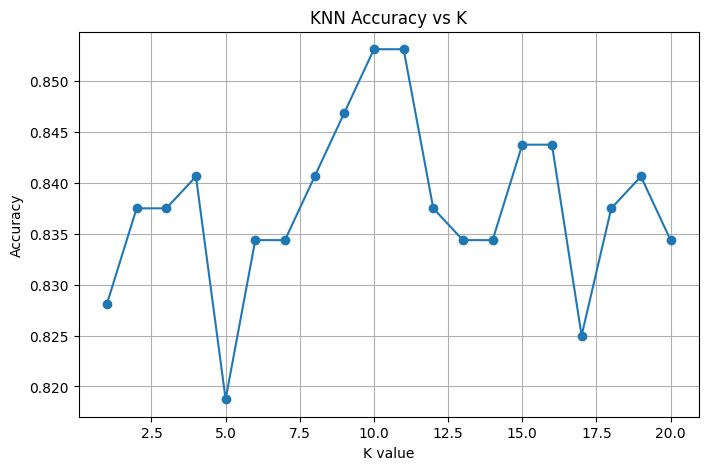

In [55]:
# plot map of testing accuracy, but ended up going with f1_score macro
# more total predictions are correct
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K')
plt.grid(True)
plt.show()

In [56]:
# made a function for f1_score just like I did for accuracy above so I could plot the best output
k_values = range(1, 21)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax_scaled, y_train)
    preds = knn.predict(X_test_minmax_scaled)
    
    f1 = f1_score(y_test, preds, average='macro', zero_division=0)
    f1_scores.append(f1)

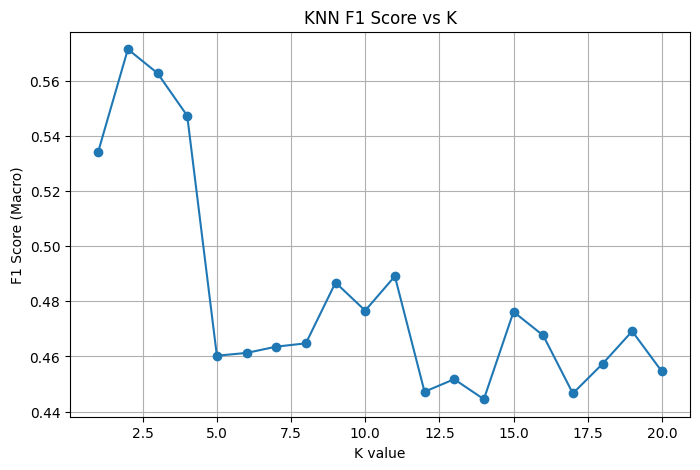

In [57]:
# plot chart for using f1_score macro
# better balance of precision & recall across all classes
plt.figure(figsize=(8,5))
plt.plot(k_values, f1_scores, marker='o')
plt.xlabel('K value')
plt.ylabel('F1 Score (Macro)')
plt.title('KNN F1 Score vs K')
plt.grid(True)
plt.show()

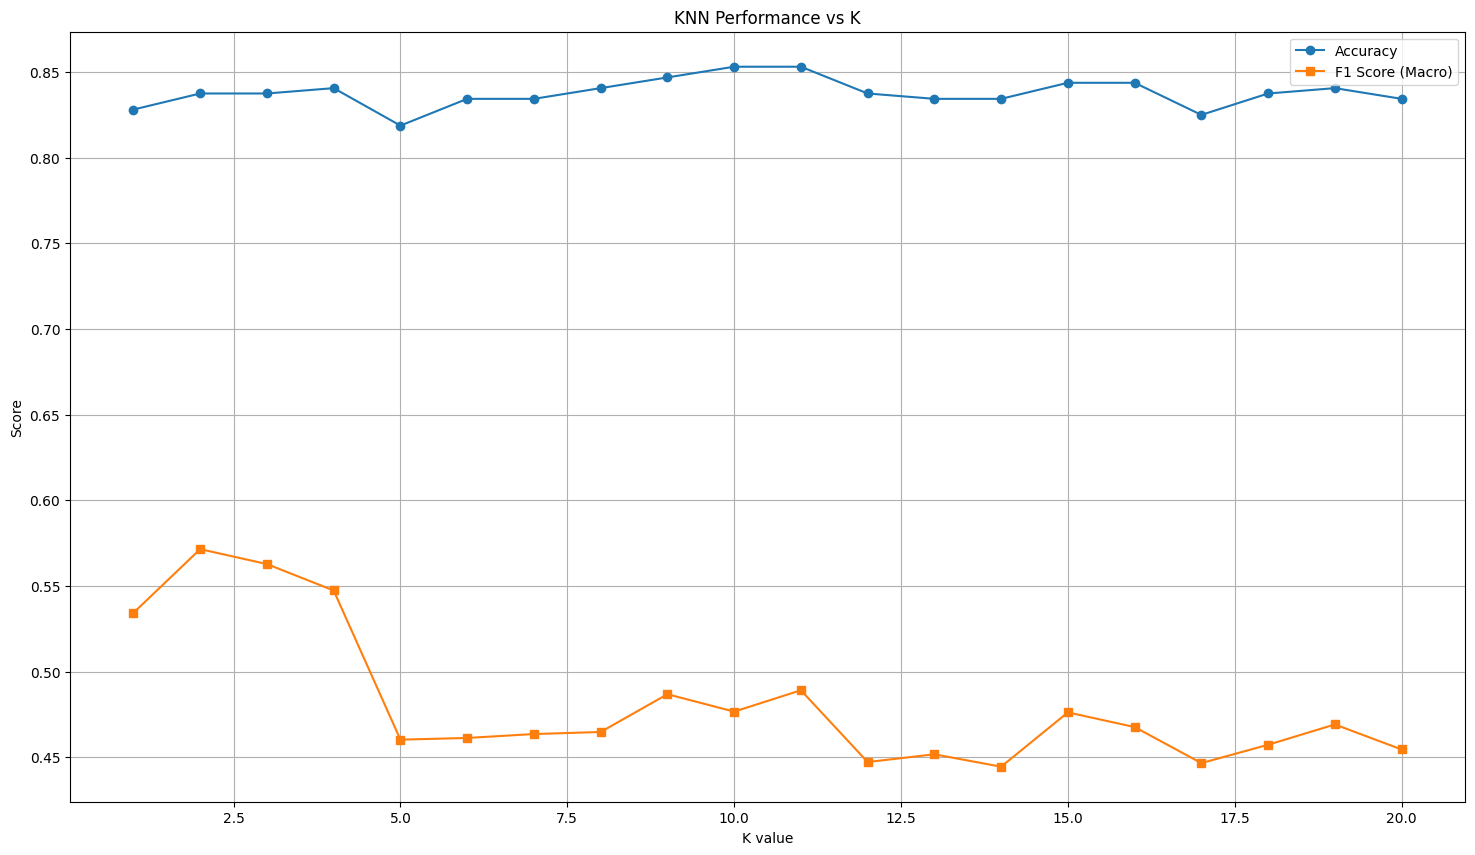

In [58]:
# now putting them (accuracy / f1_score) on the same chart we see the K performance
plt.figure(figsize=(18,10))

plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, f1_scores, marker='s', label='F1 Score (Macro)')

plt.xlabel('K value')
plt.ylabel('Score') # model performance metric
plt.title('KNN Performance vs K')
plt.legend()
plt.grid(True)

plt.show()

## Accuracy peaks at higher K values, F1-macro is maximized at lower K values, indicating better balanced performance across 
## low, medium, and high wine quality classes. Therefore, F1-macro was chosen as the optimization metric.

    F1 was stricter and more honest

## IN ENGLISH

    so accuracy looks more perfect because a majority of the wine was medium and it did good at guessing medium so got the higher score, 
    f1 got a lower score because it dug in and got better predictions. similar to saying it is easy to guess the bulk and get a high score 
    vs guessing the qualities with less amounts, but we at least got output now those qualities

## NOW LETS SAVE THE BEST MODEL

In [ ]:
# I am using F1-macro optimized model as final model due to class imbalance
final_model = best_model_f1

In [60]:
import os

os.makedirs('../models', exist_ok=True)

In [61]:
# better than pickle
import joblib

joblib.dump(final_model, '../models/wine_knn_pipeline_f1.joblib')

print('Final model saved successfully.')

Final model saved successfully.


## EXTRA CREDIT

In [62]:
def predict_wine_quality(features):

    feature_names = [
        'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol'
    ]

    # Convert input to DataFrame (Pipeline expects this format)
    input_df = pd.DataFrame([features], columns=feature_names)

    # Predict using FINAL trained pipeline
    prediction = final_model.predict(input_df)[0]

    quality_map = {
        0: 'This wine is likely of LOW quality',
        1: 'This wine is likely of MEDIUM quality',
        2: 'This wine is likely of HIGH quality'
    }

    return quality_map[prediction]

In [63]:
# NUMBERS FROM PROJECT REQUESTED
predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])

'This wine is likely of MEDIUM quality'

In [64]:
# NEW SET OF NUMBER TO RUN THROUGH
predict_wine_quality([8.5, 0.28, 0.45, 2.3, 0.050, 20.0, 60.0, 0.9940, 3.25, 0.80, 12.8])

'This wine is likely of HIGH quality'